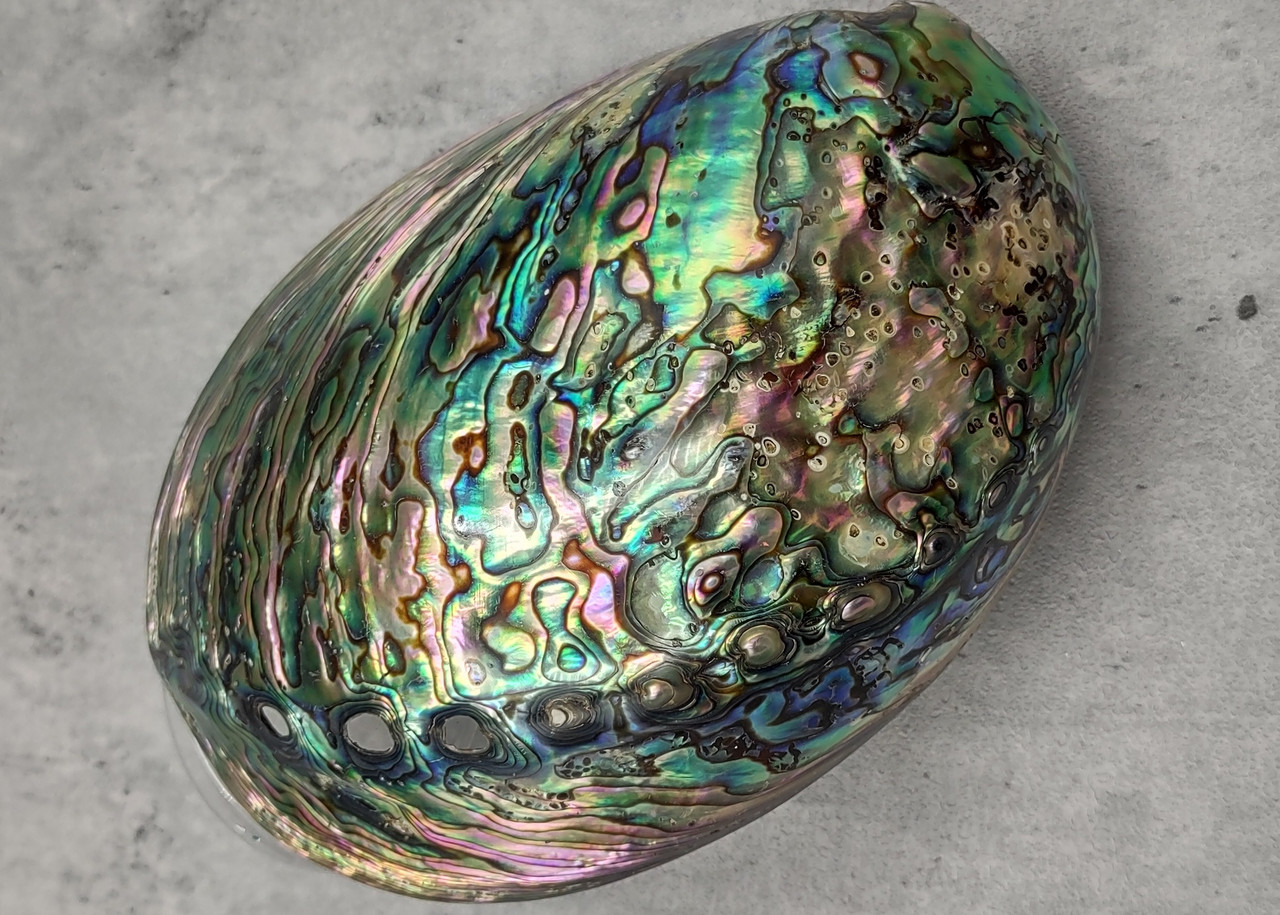

In [290]:
from IPython.display import Image
Image("abalone.jpg", width=200, height=100)

In [291]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

abalone = pd.read_csv("data/abalone.csv")

df = abalone

abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Choose target value

In [292]:
abalone["Rings"]

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

# Encode the categorical features

In [293]:
abalone["Sex"] = abalone["Sex"].astype('category')
abalone["Sex"] = abalone["Sex"].cat.codes
abalone["Sex"]

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int8

#  Train the regression model 

In [294]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [295]:


from sklearn.model_selection import train_test_split

X = abalone.drop(columns='Rings')
Y = abalone["Rings"].values
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, test_size=0.2,random_state=0)

print("X --------- X",X)
print("Y --------- Y",Y)



X --------- X       Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3        

random state = 0 train test split deer bh ystoi daraagiin udaa dahin ajilluulahad ijil data gargana

In [296]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [297]:
from sklearn.metrics import r2_score

Y_pred = model.predict(X_test)
r_squared = r2_score(Y_test, Y_pred)
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(df)
print(r_squared)


     Actual  Predicted
0        13  13.057900
1         8   9.650698
2        11  10.380072
3         5   5.644010
4        12  10.708657
..      ...        ...
831      11  10.478477
832      12   8.675782
833       7   8.559960
834      17  12.087536
835       4   5.788278

[836 rows x 2 columns]
0.5300147524184924


In [298]:
r2_score(Y_test,Y_pred)

0.5300147524184924

# Learn the result

In [299]:
coefficients = model.coef_
intercept = model.intercept_



print("Coefficients:", coefficients)
print("----------------------------")
print("Intercept   :", intercept)

Coefficients: [  0.07222858  -1.31597839  13.55068234   9.20700521   9.66281239
 -20.69570857  -9.853576     8.15024148]
----------------------------
Intercept   : 2.9926217991723316


In [300]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y_train,X_train)
est = model.fit()

print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              8702.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):                        0.00
Time:                        18:05:02   Log-Likelihood:                         -7429.3
No. Observations:                3341   AIC:                                  1.487e+04
Df Residuals:                    3333   BIC:                                  1.492e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Define the problems of regression

No problem

# Solve the problem and train the model

we dont have problem

# AIC, BIC, Backward selection 

In [301]:
import statsmodels.api as sm

model = sm.OLS(X_train, Y_train).fit()

aic = model.aic
bic = model.bic

print('AIC:', aic)
print('BIC:', bic)


AIC: 9712.769518266068
BIC: 9718.883543708425


# Make predictions

In [302]:
import statsmodels.api as sm




model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()


confidence_interval = model.conf_int()


print("Confidence Intervals :")
print(confidence_interval)




Confidence Intervals :
                        0          1
const            2.389237   3.596006
Sex             -0.018879   0.163337
Length          -5.288540   2.656584
Diameter         8.697420  18.403945
Height           6.059885  12.354125
Whole weight     8.106087  11.219538
Shucked weight -22.470184 -18.921233
Viscera weight -12.644779  -7.062373
Shell weight     5.740607  10.559876


c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
